## __Logistic Regression__

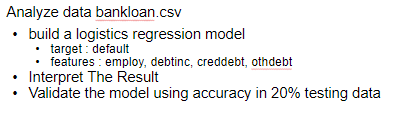

In [1]:
import pandas as pd
import numpy as np

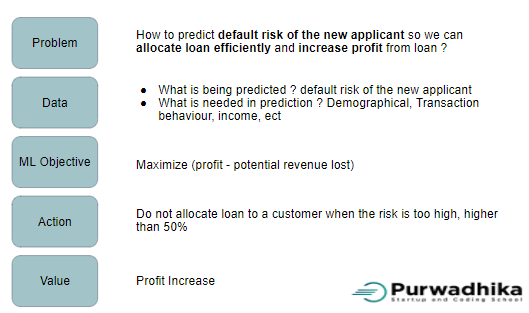

In [2]:
bank = pd.read_csv('bankloan.csv')
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [4]:
X = bank[fitur]
y = bank[target]

In [5]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


## __Modelling__

In [6]:
import statsmodels.api as sm

In [7]:
sm_logit = sm.Logit(y, sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:                  0.2844
Time:                        14:01:33   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

## __Colinearity__

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
calc_vif(X)

,variables,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


In [50]:
-(np.exp(0.2436*1))
# B1 = -0.2436 : When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times

-1.2758338948511923

In [13]:
np.exp(0.0885*1)
# B2 = 0.0885 : When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times

1.0925342526104793

In [14]:
np.exp(0.5041*5)
# B3 = 0.5041 :  When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times

12.434812515742879

LLR-Test:
<br>
B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.
<br>
Wald Test:
1. B0 : P-Value of the partial test is below 0.05. We need B0 in the model
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.
1. B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.
1. B3 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate

Parameter Estimate:
1. B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times 
1. B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
1. B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
Pseudo R-Square = 28.44% : This model can explain 28.33% variation of default rate.

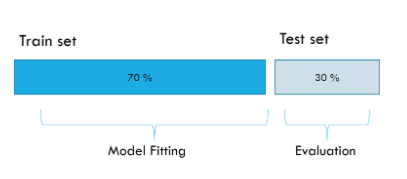

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2021)

In [17]:
y['default'].value_counts(normalize=True)

0    0.738571
1    0.261429
Name: default, dtype: float64

In [18]:
y['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [19]:
y_train['default'].value_counts(normalize=True)

0    0.739286
1    0.260714
Name: default, dtype: float64

In [20]:
y_train['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [21]:
y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

In [22]:
y_test['default'].value_counts()

0    103
1     37
Name: default, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [25]:
y_pred = logit.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

In [26]:
y_proba = logit.predict_proba(X_test)
y_proba[:5]

array([[0.90175195, 0.09824805],
       [0.98899285, 0.01100715],
       [0.80813672, 0.19186328],
       [0.7552628 , 0.2447372 ],
       [0.80381819, 0.19618181]])

In [27]:
X_test.columns

Index(['employ', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

In [28]:
logit.coef_

array([[-0.21485105,  0.09407482,  0.4674277 , -0.04253434]])

In [29]:
employ, debtinc, creddebt, othdebt = logit.coef_[0]
print(employ)
print(debtinc)
print(creddebt)
print(othdebt)

-0.21485105429856197
0.09407481636614191
0.46742769715103955
-0.04253433886567236


In [30]:
b0 = logit.intercept_[0]
b0

-1.29938727807727

In [31]:
pred_proba = pd.DataFrame({'pred': y_pred, 'proba0': y_proba[:,0], 'proba1': y_proba[:,1]})
pred_proba.head()

,pred,proba0,proba1
0,0,0.901752,0.098248
1,0,0.988993,0.011007
2,0,0.808137,0.191863
3,0,0.755263,0.244737
4,0,0.803818,0.196182


In [38]:
X_test

,employ,debtinc,creddebt,othdebt
138,8,6.7,0.469536,1.138464
49,18,7.4,0.205128,2.902872
126,7,13.0,1.016600,7.823400
363,2,6.7,0.112560,1.897440
558,2,2.5,0.199325,0.225675
...,...,...,...,...
491,13,25.2,2.316132,20.615868
485,4,5.8,0.569850,0.880150
688,12,10.8,1.365984,5.978016
408,13,5.0,0.237600,1.112400


## __Pembuktian Sigmoid Function__

$ \displaystyle S = \frac{e^{\alpha}}{1+e^{\alpha}} $

In [39]:
proba_1 = np.exp(b0 + (employ*X_test['employ']) + (debtinc*X_test['debtinc']) + (creddebt*X_test['creddebt']) + (othdebt*X_test['othdebt']))/(1 + (np.exp(b0 + (employ*X_test['employ']) + (debtinc*X_test['debtinc']) + (creddebt*X_test['creddebt']) + (othdebt*X_test['othdebt']))))
proba_1.reset_index(drop=True, inplace=True)
proba_1[:5]

0    0.098248
1    0.011007
2    0.191863
3    0.244737
4    0.196182
dtype: float64

In [40]:
pred_proba['P(y=1)'] = proba_1
pred_proba['P(y=0)'] = 1 - pred_proba['P(y=1)']
pred_proba.head()

,pred,proba0,proba1,P(y=1),P(y=0)
0,0,0.901752,0.098248,0.098248,0.901752
1,0,0.988993,0.011007,0.011007,0.988993
2,0,0.808137,0.191863,0.191863,0.808137
3,0,0.755263,0.244737,0.244737,0.755263
4,0,0.803818,0.196182,0.196182,0.803818


## __Pembuktian Sigmoid Function__

$ \displaystyle S = \frac{1}{1+e^{-\alpha}} $

In [41]:
proba_1_ = 1/(1 + (np.exp(-(b0 + (employ*X_test['employ']) + (debtinc*X_test['debtinc']) + (creddebt*X_test['creddebt']) + (othdebt*X_test['othdebt'])))))
proba_1_.reset_index(drop=True, inplace=True)
proba_1_[:5]

0    0.098248
1    0.011007
2    0.191863
3    0.244737
4    0.196182
dtype: float64

In [42]:
pred_proba['P(y=1)_'] = proba_1_
pred_proba['P(y=0)_'] = 1 - pred_proba['P(y=1)_']
pred_proba.head()

,pred,proba0,proba1,P(y=1),P(y=0),P(y=1)_,P(y=0)_
0,0,0.901752,0.098248,0.098248,0.901752,0.098248,0.901752
1,0,0.988993,0.011007,0.011007,0.988993,0.011007,0.988993
2,0,0.808137,0.191863,0.191863,0.808137,0.191863,0.808137
3,0,0.755263,0.244737,0.244737,0.755263,0.244737,0.755263
4,0,0.803818,0.196182,0.196182,0.803818,0.196182,0.803818


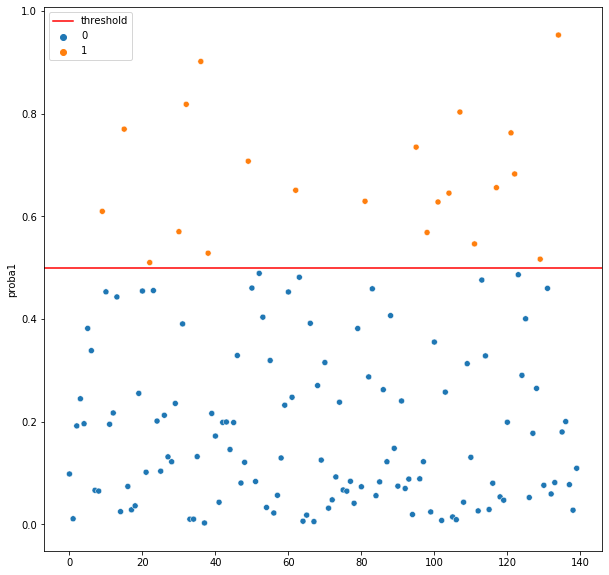

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x=np.arange(len(pred_proba)), y=pred_proba['proba1'], hue=pred_proba['pred'])
plt.axhline(0.5, color='red', label='threshold')
plt.legend()
plt.show()

In [37]:
copy = bank[fitur].copy()
copy['default'] = bank[target].copy()
copy.head()

,employ,debtinc,creddebt,othdebt,default
0,17,9.3,11.359392,5.008608,1
1,10,17.3,1.362202,4.000798,0
2,15,5.5,0.856075,2.168925,0
3,15,2.9,2.658720,0.821280,0
4,2,17.3,1.787436,3.056564,1


In [54]:
from sklearn import datasets
breast = datasets.load_breast_cancer()
dir(breast)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [67]:
print(breast['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [56]:
df = pd.DataFrame(data=breast['data'], columns=breast['feature_names'])
df['target'] = breast['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [62]:
first_10 = df.iloc[:,:11]
first_10['target'] = df['target'].copy()
first_10

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,0


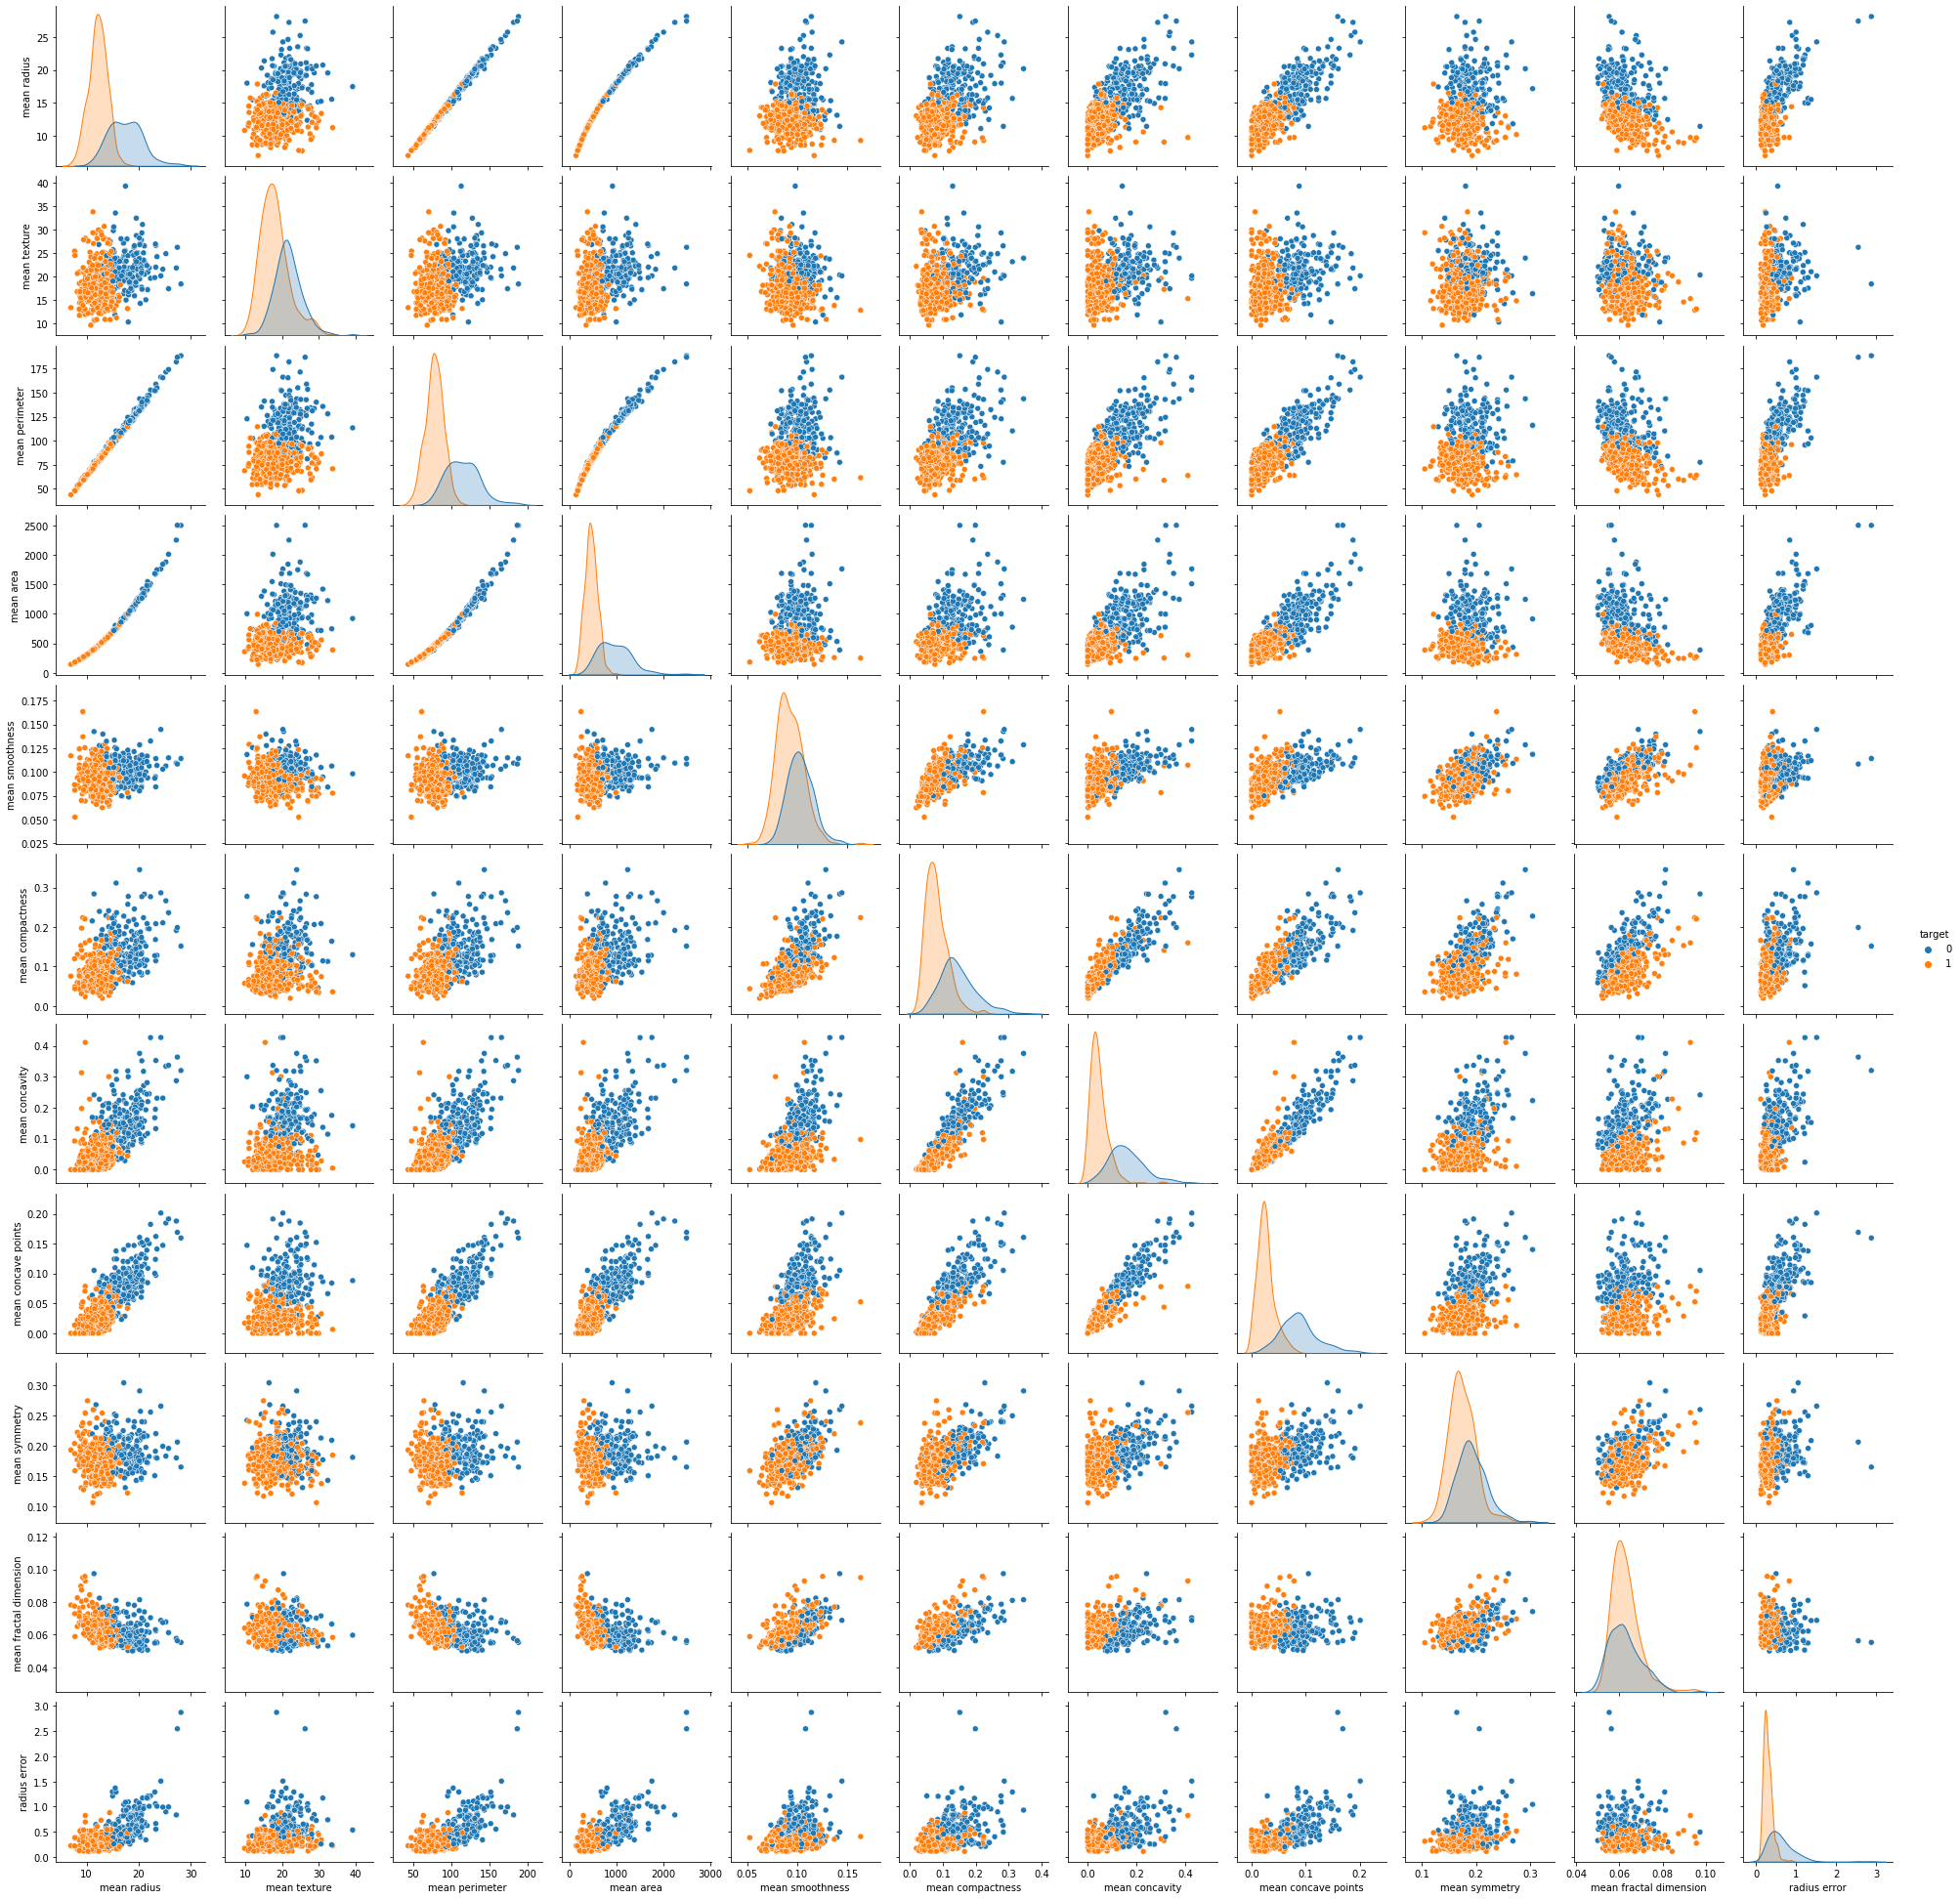

In [63]:
sns.pairplot(data=first_10, hue='target')

In [65]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [ ]:
xi = ['mean_perimeter', 'mean_concave_points']
yi = ['target']

xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, stratify=yi, test_size=0.2)

lr = LogisticRegression()
